In [1]:
#Import modules
import pandas as pd
import csv
import numpy as np
import cartopy
import matplotlib.pyplot as plt
from metpy.plots import USCOUNTIES

In [2]:
#Define  filepath variables to be used later for reading/writing files
user = ''
directory = '\\\\isgs-sinkhole.ad.uillinois.edu\\geophysics\\Balikian\\ISWS_HydroGeo\\MetroEast_HydroGeo\\WellData\\'
wells_filename = 'ESL_Wells_DescriptionsAndXYZ_GISExport.txt'
encodeType = 'latin1'

In [5]:
#Read in well description data to pandas dataframe
wells = pd.read_csv(directory+wells_filename, sep=',', header='infer', encoding=encodeType,usecols=['API_Number','TOP', 'BOTTOM', 'FORMATION_SHORT', 'LITHOLOGY', 'COLOR','CONSISTENCY', 'MOD1', 'MOD2','INTERPRETED', 'COMPLETED', 'Latitude_Calc', 'LongitudeCalc', 'Surf_Elev_ft'])
wells.columns = ['API_NUMBER','TOP', 'BOTTOM', 'FORMATION_SHORT', 'LITHOLOGY', 'COLOR','CONSISTENCY', 'MOD1', 'MOD2','INTERPRETED', 'COMPLETED', 'LATITUDE', 'LONGITUDE', 'SURF_ELEV_ft']
wells

,API_NUMBER,TOP,BOTTOM,FORMATION_SHORT,LITHOLOGY,COLOR,CONSISTENCY,MOD1,MOD2,INTERPRETED,COMPLETED,LATITUDE,LONGITUDE,SURF_ELEV_ft
0,1.202727e+11,0.0,20.0,clay brown,CLAY,BROWN,NaN,NaN,NaN,CLAY,1.0,38.733338,-89.933360,NaN
1,1.202727e+11,20.0,40.0,"clay gray sandy, soft",NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.733338,-89.933360,NaN
2,1.202727e+11,40.0,44.0,"clay gray, sticky",CLAY,GRAY,STICKY,NaN,NaN,CLAY,-1.0,38.733338,-89.933360,NaN
3,1.202727e+11,44.0,50.0,"clay dark brown, wood",NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.733338,-89.933360,NaN
4,1.202727e+11,50.0,114.0,shale gray sandy hard,BEDROCK,GRAY,HARD,SHALE,NaN,BEDROCK,1.0,38.733338,-89.933360,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34741,2.200000e+01,0.0,100.0,BEDROCK,BEDROCK,NaN,NaN,NaN,NaN,BEDROCK,1.0,38.508578,-90.276338,NaN
34742,2.300000e+01,0.0,100.0,BEDROCK,BEDROCK,NaN,NaN,NaN,NaN,BEDROCK,1.0,38.616025,-90.198090,NaN
34743,2.400000e+01,0.0,100.0,BEDROCK,BEDROCK,NaN,NaN,NaN,NaN,BEDROCK,1.0,38.621458,-90.191269,NaN
34744,2.500000e+01,0.0,100.0,BEDROCK,BEDROCK,NaN,NaN,NaN,NaN,BEDROCK,1.0,38.715260,-90.234239,NaN


In [6]:
#Recast API Number column as floats for size and to ensure they match between dataframes
wells['API_NUMBER'] = wells['API_NUMBER'].astype(float)

In [7]:
#Replace empty cells in top/bottom columns with nans to aid later processing
wells['TOP'] = wells['TOP'].replace('', np.nan)
wells['BOTTOM'] = wells['BOTTOM'].replace('', np.nan)

In [8]:
#Convert necessary columns to float
wells['TOP'] = wells['TOP'].astype(float)
wells['BOTTOM'] = wells['BOTTOM'].astype(float)

wells['LATITUDE'] = wells['LATITUDE'].astype(float)
wells['LONGITUDE'] = wells['LONGITUDE'].astype(float)

In [9]:
#Get well interval elevations in feet from surface elevation depth
wells['TOP_ELEV_ft'] = wells['SURF_ELEV_ft'] - wells['TOP']
wells['BOT_ELEV_ft'] = wells['SURF_ELEV_ft'] - wells['BOTTOM']

In [10]:
#Quality Checks
#View new dataframe
wells

,API_NUMBER,TOP,BOTTOM,FORMATION_SHORT,LITHOLOGY,COLOR,CONSISTENCY,MOD1,MOD2,INTERPRETED,COMPLETED,LATITUDE,LONGITUDE,SURF_ELEV_ft,TOP_ELEV_ft,BOT_ELEV_ft
0,1.202727e+11,0.0,20.0,clay brown,CLAY,BROWN,NaN,NaN,NaN,CLAY,1.0,38.733338,-89.933360,NaN,NaN,NaN
1,1.202727e+11,20.0,40.0,"clay gray sandy, soft",NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.733338,-89.933360,NaN,NaN,NaN
2,1.202727e+11,40.0,44.0,"clay gray, sticky",CLAY,GRAY,STICKY,NaN,NaN,CLAY,-1.0,38.733338,-89.933360,NaN,NaN,NaN
3,1.202727e+11,44.0,50.0,"clay dark brown, wood",NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.733338,-89.933360,NaN,NaN,NaN
4,1.202727e+11,50.0,114.0,shale gray sandy hard,BEDROCK,GRAY,HARD,SHALE,NaN,BEDROCK,1.0,38.733338,-89.933360,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34741,2.200000e+01,0.0,100.0,BEDROCK,BEDROCK,NaN,NaN,NaN,NaN,BEDROCK,1.0,38.508578,-90.276338,NaN,NaN,NaN
34742,2.300000e+01,0.0,100.0,BEDROCK,BEDROCK,NaN,NaN,NaN,NaN,BEDROCK,1.0,38.616025,-90.198090,NaN,NaN,NaN
34743,2.400000e+01,0.0,100.0,BEDROCK,BEDROCK,NaN,NaN,NaN,NaN,BEDROCK,1.0,38.621458,-90.191269,NaN,NaN,NaN
34744,2.500000e+01,0.0,100.0,BEDROCK,BEDROCK,NaN,NaN,NaN,NaN,BEDROCK,1.0,38.715260,-90.234239,NaN,NaN,NaN


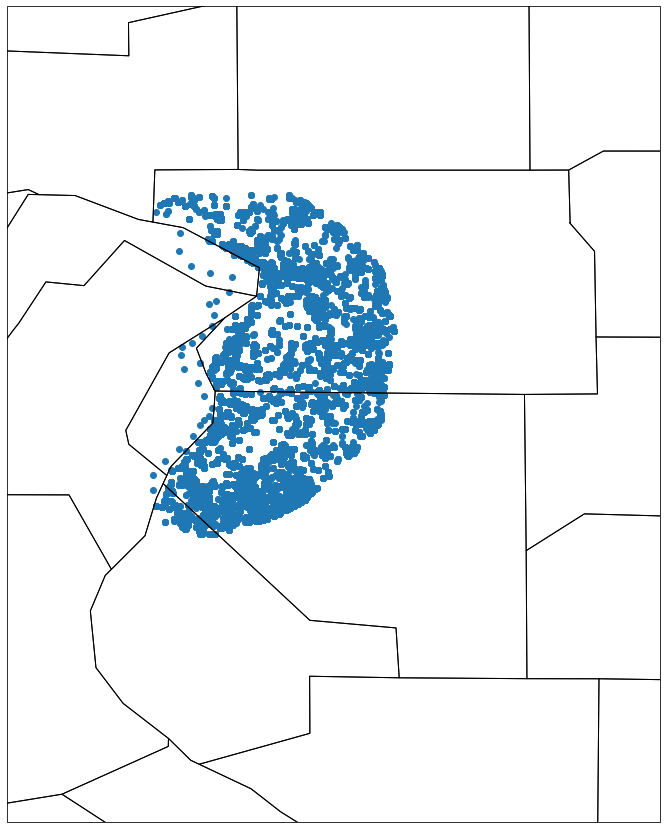

In [12]:
#Chart data 
proj = cartopy.crs.PlateCarree()

fig, ax = plt.subplots(1, figsize=(15,15), subplot_kw=dict(projection=proj))
ax.scatter(wells['LONGITUDE'], wells['LATITUDE'])
#ax.add_feature(cartopy.feature.STATES)
ax.add_feature(USCOUNTIES)
ax.set_extent([-90.5,-89.5,38,39.25])

In [11]:
#Export data to new data frame
wells.to_csv(directory+'ESL_Wells_All_Cleaned.txt')